<a href="https://colab.research.google.com/github/tadyoung8/Projects/blob/main/HoopsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Loading Code Hidden Here
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Load data
cbb = pd.read_csv('cbb.csv') 
cbb['W_ratio'] = cbb['W'] / cbb['G']
cbb['Rate'] = cbb['ADJOE'] - cbb['ADJDE'] * 1.5

In [ ]:
X = cbb[['ADJOE', '2P_O', 'ORB', 'EFG_O', 'EFG_D', '2P_D', 'Rate']]
y = cbb['W_ratio']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
cbb.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,W_ratio,Rate
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,0.825000,-19.05
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,0.900000,-11.30
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018,0.825000,-21.20
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019,0.815789,-12.60
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,0.948718,-11.65


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)
print(model.intercept_)

0.08236602476253635


In [ ]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
ADJOE,-0.002533
2P_O,0.000704
ORB,0.007862
EFG_O,0.028169
EFG_D,-0.025354
2P_D,0.011000
Rate,0.004807


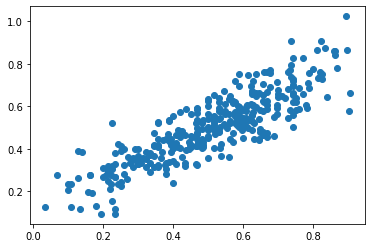

In [ ]:
pred = model.predict(X_test)
plt.scatter(y_test, pred)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print_evaluate(y_test, test_pred)
print_evaluate(y_train, train_pred)

MAE: 0.07365129004802871
MSE: 0.008653654699020972
RMSE: 0.09302502189744957
R2 Square 0.7416800567936372
__________________________________
MAE: 0.07300065518733355
MSE: 0.00824775999102816
RMSE: 0.09081717894224726
R2 Square 0.7371655772528509
__________________________________


In [ ]:
results = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.073651,0.008654,0.093025,0.74168,0.59189
